In [1]:
import numpy as np
import pandas as pd
df= pd.read_csv('wineQualityWhites.csv',sep=',')

In [2]:
X=df[list(df.columns)[:-1]]
Y=df['quality']

In [3]:
X=np.append(arr=np.ones((X.shape[0],1)), values =X,axis=1)
X_opt = X[:, [0,1,2,3,4,5,6,7,8,9,10,11]]

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)

In [5]:
#Scalint the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [6]:
#building a model
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
#prediction
predictions = regressor.predict(X_test)


In [8]:
#evaulating using metrics
from sklearn.metrics import r2_score
r2_score(Y_test,predictions)


0.27048919970292384

In [9]:
#backwards elimantion
import statsmodels.api as sm
X_opt = X[:, [0,1,2,3,4,5,6,7,8,9,10,11]]
regressor_OLS= sm.OLS(endog =Y, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     173.9
Date:                Sun, 30 Aug 2020   Prob (F-statistic):               0.00
Time:                        00:28:37   Log-Likelihood:                -5545.7
No. Observations:                4898   AIC:                         1.112e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        297.8514      8.770     33.962      0.000     280.658     315.045
x1         -6.544e-05   8.46e-06     -7.738      0.000    -8.2e-05   -4.89e-05
x2             0.1421      0.017      8.394      0.000       0.109       0.175
x3            -1.7184      0.112    -15.344      0.000      -1.938      -1.499
x4             0.0199      0.096      0.207      0.836      -0.168       0.208
x5             0.1355      0.005     28.282      0.000       0.126       0.145
x6            -0.0946      0.547     -0.173      0.863      -1.168       0.978
x7             0.0033      0.001      3.975      0.000       0.002       0.005
x8            -0.0004      0.000     -1.039      0.299      -0.001       0.000
x9          -298.7801      8.990    -33.236      0.000    -316.404    -281.156
x10            1.0383      0.088     11.745      0.000       0.865       1.212
x11            0.9071      0.098      9.271      0.000       0.715       1.099
==============================================================================
Omnibus:                      246.766   Durbin-Watson:                   1.638
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              823.434
Skew:                           0.153   Prob(JB):                    1.56e-179
Kurtosis:                       4.985   Cond. No.                     3.31e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.31e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

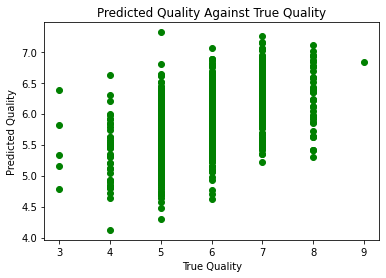

In [11]:
#Displaying the results
import matplotlib.pylab as plt
plt.scatter(Y_test,predictions,c='g')
plt.xlabel('True Quality')
plt.ylabel('Predicted Quality')
plt.title('Predicted Quality Against True Quality')
plt.show()